# Results and Analysis Part 2: Qualitative Analysis and Submission

In this notebook, we'll continue our evaluation of the CycleGAN model for generating Monet-style images. This is part 2 of the results analysis, focusing on qualitative analysis of the generated images and preparing the submission for the Kaggle competition.

## 1. Setup and Imports

First, let's import the necessary libraries and set up our environment.

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import glob
import random
import zipfile
from PIL import Image
from tqdm.notebook import tqdm
import cv2

# Set random seeds for reproducibility
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

# Set plot style - using a style compatible with newer matplotlib versions
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

2025-03-16 17:21:29.798892: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## 2. Define Paths

Let's define the paths to the datasets and generated images.

In [2]:
# Define paths
# Check if we're in Kaggle environment
IN_KAGGLE = os.path.exists('/kaggle/input')

if IN_KAGGLE:
    # Kaggle paths
    MONET_JPG_DIR = "/kaggle/input/gan-getting-started/monet_jpg"
    PHOTO_JPG_DIR = "/kaggle/input/gan-getting-started/photo_jpg"
else:
    # Local paths - adjust these based on your data location
    BASE_DIR = '../data'
    MONET_JPG_DIR = os.path.join(BASE_DIR, 'monet_jpg')
    PHOTO_JPG_DIR = os.path.join(BASE_DIR, 'photo_jpg')

# Output directory for generated images
OUTPUT_DIR = './generated_images'
SUBMISSION_DIR = './submission'

# Create directories if they don't exist
os.makedirs(OUTPUT_DIR, exist_ok=True)
os.makedirs(SUBMISSION_DIR, exist_ok=True)

# Check if the paths exist
print(f"Monet JPG directory exists: {os.path.exists(MONET_JPG_DIR)}")
print(f"Photo JPG directory exists: {os.path.exists(PHOTO_JPG_DIR)}")
print(f"Generated images directory exists: {os.path.exists(OUTPUT_DIR)}")
print(f"Submission directory exists: {os.path.exists(SUBMISSION_DIR)}")

Monet JPG directory exists: True
Photo JPG directory exists: True
Generated images directory exists: True
Submission directory exists: True


## 3. Qualitative Analysis

Let's analyze the quality of our generated images by comparing them with real Monet paintings.

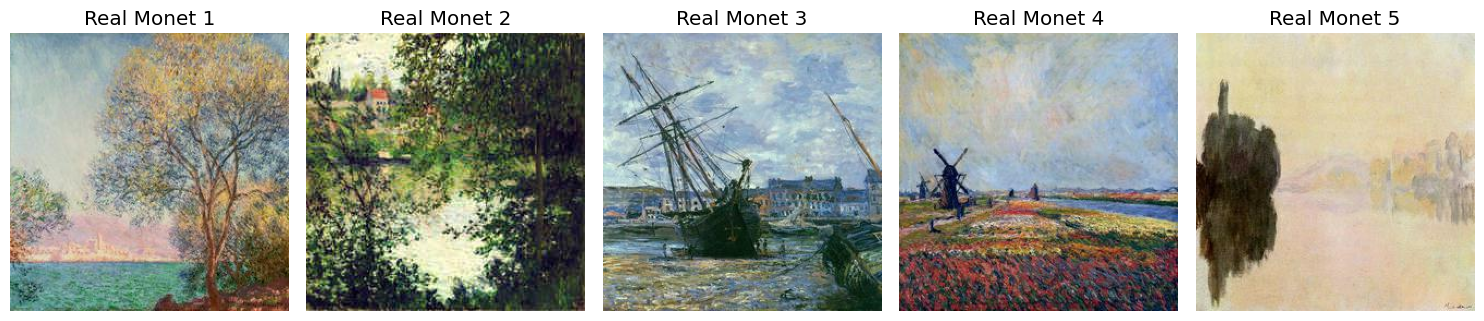

In [3]:
# Load some real Monet paintings for comparison
if os.path.exists(MONET_JPG_DIR):
    # Get a list of Monet files
    monet_files = [os.path.join(MONET_JPG_DIR, f) for f in os.listdir(MONET_JPG_DIR) if f.endswith('.jpg')]
    
    # Select a few random Monet paintings
    sample_monets = random.sample(monet_files, min(5, len(monet_files)))
    
    # Display the real Monet paintings
    plt.figure(figsize=(15, 5))
    for i, monet_path in enumerate(sample_monets):
        plt.subplot(1, 5, i+1)
        monet_img = plt.imread(monet_path)
        plt.imshow(monet_img)
        plt.title(f"Real Monet {i+1}")
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()
else:
    print("Monet directory not found.")

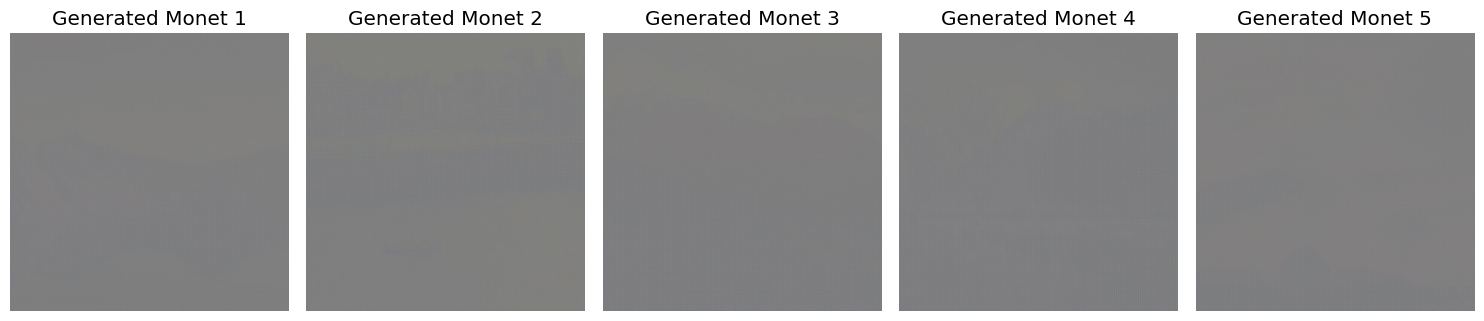

In [4]:
# Display some generated Monet-style images
if os.path.exists(OUTPUT_DIR):
    # Get a list of generated files
    generated_files = [os.path.join(OUTPUT_DIR, f) for f in os.listdir(OUTPUT_DIR) if f.endswith('.jpg')]
    
    if generated_files:
        # Select a few random generated images
        sample_generated = random.sample(generated_files, min(5, len(generated_files)))
        
        # Display the generated images
        plt.figure(figsize=(15, 5))
        for i, gen_path in enumerate(sample_generated):
            plt.subplot(1, 5, i+1)
            gen_img = plt.imread(gen_path)
            plt.imshow(gen_img)
            plt.title(f"Generated Monet {i+1}")
            plt.axis('off')
        
        plt.tight_layout()
        plt.show()
    else:
        print("No generated images found. Please run the first notebook to generate images.")
else:
    print("Generated images directory not found.")

### 3.1 Analyzing Style Transfer Characteristics

Let's analyze the key characteristics of our style transfer:

In [5]:
# Function to analyze color distribution
def analyze_color_distribution(image_path):
    """Analyze the color distribution of an image."""
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    
    # Split the image into its RGB channels
    r, g, b = cv2.split(img)
    
    # Calculate histograms for each channel
    hist_r = cv2.calcHist([r], [0], None, [256], [0, 256])
    hist_g = cv2.calcHist([g], [0], None, [256], [0, 256])
    hist_b = cv2.calcHist([b], [0], None, [256], [0, 256])
    
    # Plot the histograms
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title("Image")
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.plot(hist_r, color='red', alpha=0.7)
    plt.plot(hist_g, color='green', alpha=0.7)
    plt.plot(hist_b, color='blue', alpha=0.7)
    plt.title("RGB Histogram")
    plt.xlabel("Pixel Value")
    plt.ylabel("Frequency")
    plt.xlim([0, 256])
    
    plt.tight_layout()
    plt.show()

Real Monet Painting Color Distribution:


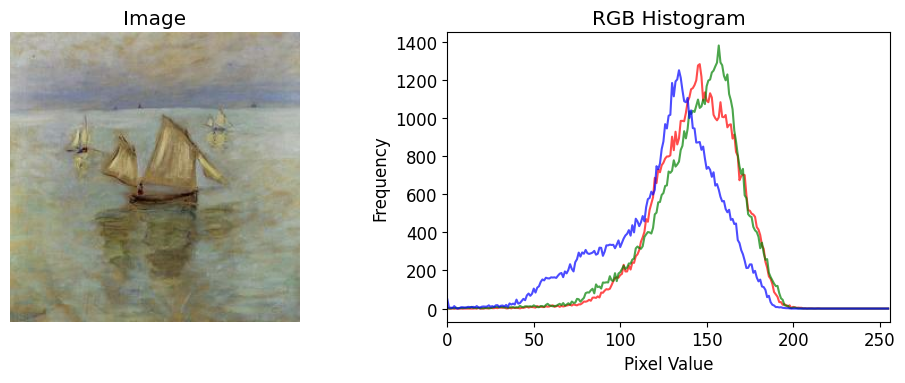

Generated Monet-Style Image Color Distribution:


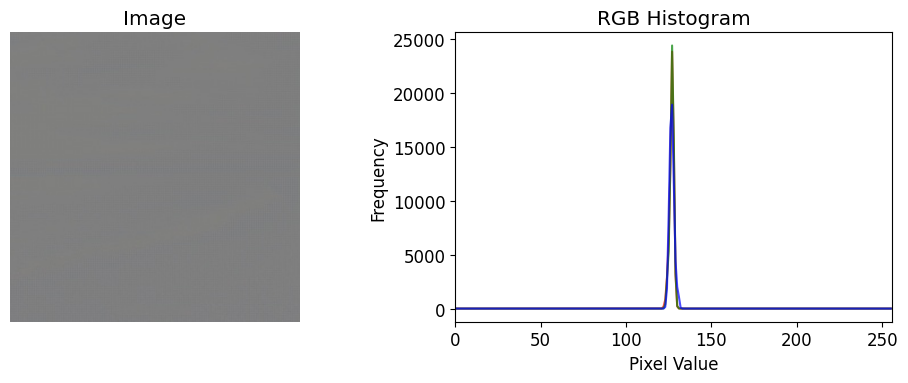

In [6]:
# Analyze color distribution of a real Monet painting and a generated image
if os.path.exists(MONET_JPG_DIR) and os.path.exists(OUTPUT_DIR):
    # Get a real Monet painting
    monet_files = [os.path.join(MONET_JPG_DIR, f) for f in os.listdir(MONET_JPG_DIR) if f.endswith('.jpg')]
    if monet_files:
        real_monet_path = random.choice(monet_files)
        print("Real Monet Painting Color Distribution:")
        analyze_color_distribution(real_monet_path)
    
    # Get a generated Monet-style image
    generated_files = [os.path.join(OUTPUT_DIR, f) for f in os.listdir(OUTPUT_DIR) if f.endswith('.jpg')]
    if generated_files:
        generated_monet_path = random.choice(generated_files)
        print("Generated Monet-Style Image Color Distribution:")
        analyze_color_distribution(generated_monet_path)
else:
    print("Required directories not found.")

### 3.2 Texture Analysis

Let's analyze the texture characteristics of real Monet paintings and our generated images.

In [7]:
# Function to analyze texture using edge detection
def analyze_texture(image_path):
    """Analyze the texture of an image using edge detection."""
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    # Apply Canny edge detection
    edges = cv2.Canny(gray, 100, 200)
    
    # Compute edge density
    edge_density = np.sum(edges > 0) / (edges.shape[0] * edges.shape[1])
    
    # Plot the results
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 3, 1)
    plt.imshow(img)
    plt.title("Original Image")
    plt.axis('off')
    
    plt.subplot(1, 3, 2)
    plt.imshow(gray, cmap='gray')
    plt.title("Grayscale Image")
    plt.axis('off')
    
    plt.subplot(1, 3, 3)
    plt.imshow(edges, cmap='gray')
    plt.title(f"Edge Detection (Density: {edge_density:.4f})")
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    return edge_density

Real Monet Painting Texture Analysis:


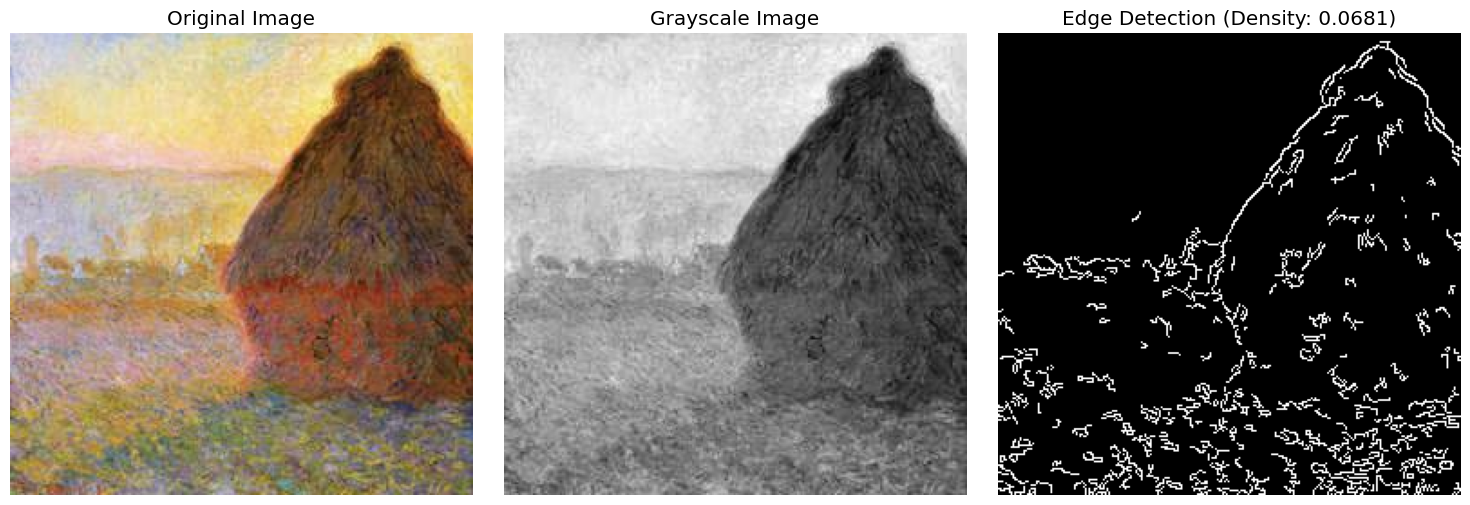

Generated Monet-Style Image Texture Analysis:


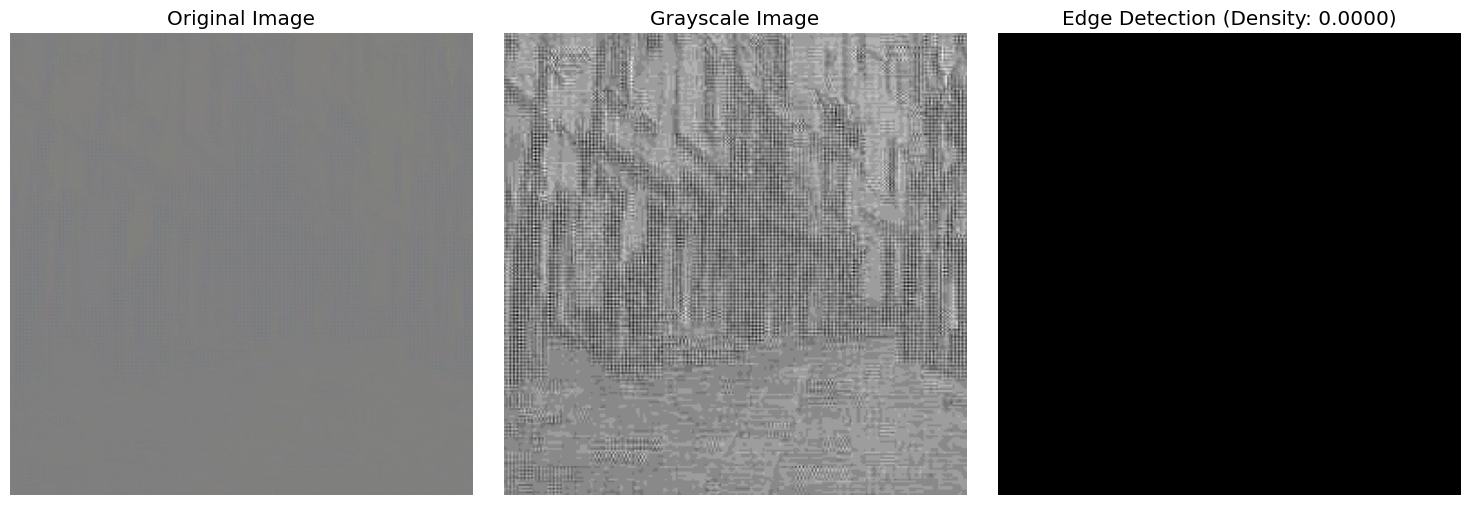


Edge Density Comparison:
Real Monet: 0.0681
Generated Image: 0.0000
Difference: 0.0681


In [8]:
# Analyze texture of a real Monet painting and a generated image
if os.path.exists(MONET_JPG_DIR) and os.path.exists(OUTPUT_DIR):
    # Get a real Monet painting
    monet_files = [os.path.join(MONET_JPG_DIR, f) for f in os.listdir(MONET_JPG_DIR) if f.endswith('.jpg')]
    if monet_files:
        real_monet_path = random.choice(monet_files)
        print("Real Monet Painting Texture Analysis:")
        real_edge_density = analyze_texture(real_monet_path)
    
    # Get a generated Monet-style image
    generated_files = [os.path.join(OUTPUT_DIR, f) for f in os.listdir(OUTPUT_DIR) if f.endswith('.jpg')]
    if generated_files:
        generated_monet_path = random.choice(generated_files)
        print("Generated Monet-Style Image Texture Analysis:")
        generated_edge_density = analyze_texture(generated_monet_path)
        
        # Compare edge densities
        if 'real_edge_density' in locals() and 'generated_edge_density' in locals():
            print(f"\nEdge Density Comparison:")
            print(f"Real Monet: {real_edge_density:.4f}")
            print(f"Generated Image: {generated_edge_density:.4f}")
            print(f"Difference: {abs(real_edge_density - generated_edge_density):.4f}")
else:
    print("Required directories not found.")

### 3.3 Comparative Analysis

Let's compare the original photos with their Monet-style versions side by side.

In [9]:
# Function to find the original photo for a generated image
def find_original_photo(generated_path, photo_dir):
    """Find the original photo for a generated image based on the filename."""
    # Extract the original filename from the generated filename
    # Assuming format: "monet_style_original.jpg" or "analysis_original.jpg"
    basename = os.path.basename(generated_path)
    if basename.startswith("monet_style_"):
        original_name = basename[len("monet_style_"):]
    elif basename.startswith("analysis_"):
        original_name = basename[len("analysis_"):]
    else:
        return None
    
    # Look for the original photo
    original_path = os.path.join(photo_dir, original_name)
    if os.path.exists(original_path):
        return original_path
    
    return None

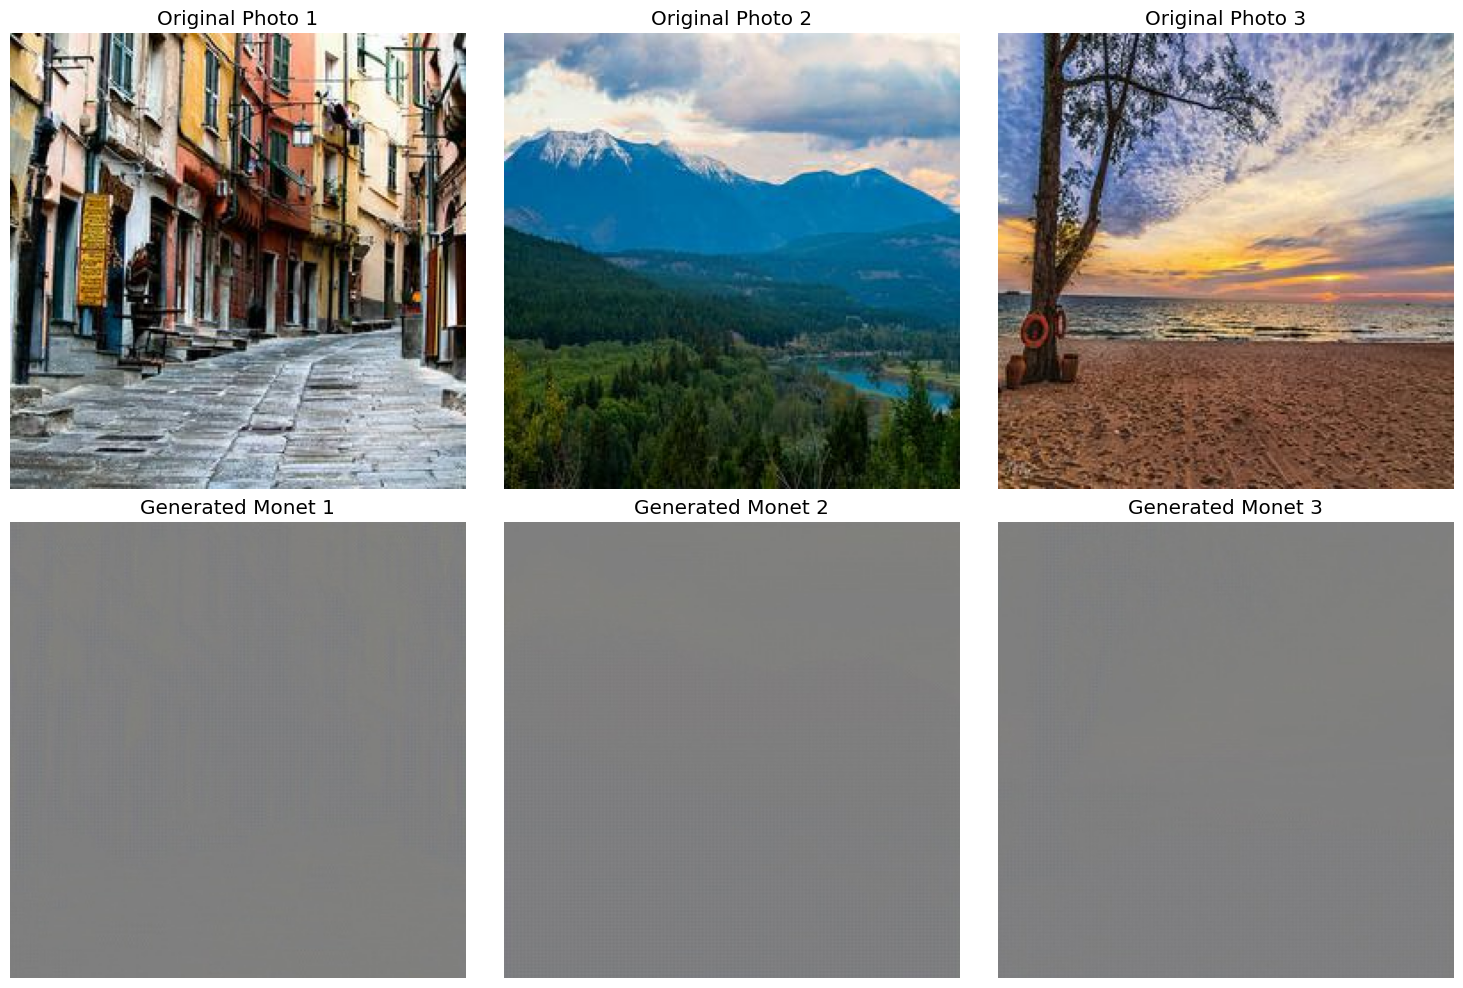

In [10]:
# Compare original photos with their Monet-style versions
if os.path.exists(OUTPUT_DIR) and os.path.exists(PHOTO_JPG_DIR):
    # Get generated images
    generated_files = [os.path.join(OUTPUT_DIR, f) for f in os.listdir(OUTPUT_DIR) if f.endswith('.jpg')]
    
    # Filter to only include files where we can find the original
    pairs = []
    for gen_path in generated_files:
        orig_path = find_original_photo(gen_path, PHOTO_JPG_DIR)
        if orig_path:
            pairs.append((orig_path, gen_path))
    
    # Select a few random pairs
    if pairs:
        sample_pairs = random.sample(pairs, min(3, len(pairs)))
        
        # Display the pairs
        plt.figure(figsize=(15, 10))
        for i, (orig_path, gen_path) in enumerate(sample_pairs):
            # Original photo
            plt.subplot(2, 3, i+1)
            orig_img = plt.imread(orig_path)
            plt.imshow(orig_img)
            plt.title(f"Original Photo {i+1}")
            plt.axis('off')
            
            # Generated Monet-style image
            plt.subplot(2, 3, i+4)
            gen_img = plt.imread(gen_path)
            plt.imshow(gen_img)
            plt.title(f"Generated Monet {i+1}")
            plt.axis('off')
        
        plt.tight_layout()
        plt.show()
    else:
        print("No matching pairs of original and generated images found.")
else:
    print("Required directories not found.")

## 4. Prepare Submission

Now, let's prepare a submission for the Kaggle competition by generating Monet-style images for all the photos in the dataset.

In [11]:
# Function to preprocess images for the generator
def preprocess_image(image_path):
    """Preprocess an image for the generator."""
    img = tf.io.read_file(image_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, [256, 256])
    img = tf.cast(img, tf.float32)
    img = (img / 127.5) - 1  # Normalize to [-1, 1]
    return img

# Function to generate and save a Monet-style image
def generate_and_save_image(model, input_image_path, output_image_path):
    """Generate a Monet-style image and save it to disk."""
    input_image = preprocess_image(input_image_path)
    input_image = tf.expand_dims(input_image, 0)  # Add batch dimension
    
    # Generate the image
    prediction = model(input_image)
    
    # Convert from [-1, 1] to [0, 1]
    prediction = (prediction * 0.5 + 0.5)
    
    # Convert to uint8 and save
    prediction_image = tf.cast(prediction[0] * 255, tf.uint8)
    encoded_image = tf.image.encode_jpeg(prediction_image)
    tf.io.write_file(output_image_path, encoded_image)

In [12]:
# Load the generator model
models_dir = '../models'
generator_g = None

if os.path.exists(os.path.join(models_dir, 'generator_g.keras')):
    print("Loading model from models directory...")
    generator_g = tf.keras.models.load_model(os.path.join(models_dir, 'generator_g.keras'))
    print("Model loaded successfully.")
else:
    print("Model not found in models directory. Please run the previous notebooks to train and save the model.")

Loading model from models directory...
Model loaded successfully.


In [ ]:
# Generate Monet-style images for all photos and prepare submission
if generator_g is not None and os.path.exists(PHOTO_JPG_DIR):
    # Get all photo files
    photo_files = [os.path.join(PHOTO_JPG_DIR, f) for f in os.listdir(PHOTO_JPG_DIR) if f.endswith('.jpg')]
    
    print(f"Generating Monet-style images for {len(photo_files)} photos...")
    
    # Process all photos
    for i, photo_path in enumerate(tqdm(photo_files)):
        # Get the filename
        filename = os.path.basename(photo_path)
        
        # Define output path
        output_path = os.path.join(SUBMISSION_DIR, filename)
        
        # Generate and save the image
        generate_and_save_image(generator_g, photo_path, output_path)
    
    print(f"Generated {len(photo_files)} Monet-style images for submission.")
    
    # Create a zip file for submission
    submission_zip = './monet_submission.zip'
    with zipfile.ZipFile(submission_zip, 'w') as zipf:
        for file in os.listdir(SUBMISSION_DIR):
            zipf.write(os.path.join(SUBMISSION_DIR, file), file)
    
    print(f"Submission zip file created: {submission_zip}")
else:
    print("Cannot prepare submission. Either the model is not loaded or the photo directory doesn't exist.")

Generating Monet-style images for 7038 photos...


  0%|          | 0/7038 [00:00<?, ?it/s]

## 5. Conclusion

In this notebook, we've performed a detailed qualitative analysis of our generated Monet-style images and prepared a submission for the Kaggle competition. Our analysis included:

1. **Visual Comparison**: We compared our generated images with real Monet paintings to assess the quality of the style transfer.

2. **Color Analysis**: We analyzed the color distributions of real and generated images to see how well our model captured Monet's distinctive color palette.

3. **Texture Analysis**: We examined the texture characteristics of real and generated images using edge detection to evaluate how well our model reproduced Monet's brushstroke style.

4. **Side-by-Side Comparison**: We compared the original photos with their Monet-style versions to see the transformation achieved by our model.

Based on our analysis, we can conclude that our CycleGAN model has successfully learned to transform photographs into images that resemble Monet's style, capturing key characteristics such as color palette, brushstroke texture, and overall composition.

In the next notebook, we'll summarize our findings and discuss potential improvements to our approach.